In [1]:
import mne
import mne_bids

from config_import import get_events

# %matplotlib qt

In [2]:
input_dir = './pogs_meg'
bids_root = './bids_data_test'
subject = 'll_180197'
session = '220217'
task = 'task'
run = '1'

In [3]:
raw = mne.io.read_raw(
    f'{input_dir}/{subject}/{session}/run{run}_raw.fif',
    allow_maxshield='yes'
)
# noisy_chs, flat_chs = mne.preprocessing.find_bad_channels_maxwell(raw)
# raw.info['bads'] = noisy_chs + flat_chs + ['MEG0623', 'MEG0241']

events = get_events(raw)
event_id = {
    "rectangle/reference": 8,
    "rectangle/outlier/1": 9,
    "rectangle/outlier/2": 10,
    "rectangle/outlier/3": 11,
    "rectangle/outlier/4": 12,
    "square/reference": 16,
    "square/outlier/1": 17,
    "square/outlier/2": 18,
    "square/outlier/3": 19,
    "square/outlier/4": 20,
    "isoTrapezoid/reference": 24,
    "isoTrapezoid/outlier/1": 25,
    "isoTrapezoid/outlier/2": 26,
    "isoTrapezoid/outlier/3": 27,
    "isoTrapezoid/outlier/4": 28,
    "parallelogram/reference": 32,
    "parallelogram/outlier/1": 33,
    "parallelogram/outlier/2": 34,
    "parallelogram/outlier/3": 35,
    "parallelogram/outlier/4": 36,
    "losange/reference": 40,
    "losange/outlier/1": 41,
    "losange/outlier/2": 42,
    "losange/outlier/3": 43,
    "losange/outlier/4": 44,
    "kite/reference": 48,
    "kite/outlier/1": 49,
    "kite/outlier/2": 50,
    "kite/outlier/3": 51,
    "kite/outlier/4": 52,
    "rightKite/reference": 56,
    "rightKite/outlier/1": 57,
    "rightKite/outlier/2": 58,
    "rightKite/outlier/3": 59,
    "rightKite/outlier/4": 60,
    "rustedHinge/reference": 64,
    "rustedHinge/outlier/1": 65,
    "rustedHinge/outlier/2": 66,
    "rustedHinge/outlier/3": 67,
    "rustedHinge/outlier/4": 68,
    "hinge/reference": 72,
    "hinge/outlier/1": 73,
    "hinge/outlier/2": 74,
    "hinge/outlier/3": 75,
    "hinge/outlier/4": 76,
    "trapezoid/reference": 80,
    "trapezoid/outlier/1": 81,
    "trapezoid/outlier/2": 82,
    "trapezoid/outlier/3": 83,
    "trapezoid/outlier/4": 84,
    "random/reference": 88,
    "random/outlier/1": 89,
    "random/outlier/2": 90,
    "random/outlier/3": 91,
    "random/outlier/4": 92,
}

Opening raw data file ./pogs_meg/ll_180197/220217/run1_raw.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 134000 ... 477999 =    134.000 ...   477.999 secs
Ready.
22 events found
Event IDs: [5]
22 events found
Event IDs: [5]
11 events found
Event IDs: [5]
180 events found
Event IDs: [5]
180 e

In [4]:
bids_path = mne_bids.BIDSPath(
    subject=subject,
    session=session,
    run=run,
    task=task,
    datatype='meg',
    suffix='meg',
    extension='.fif',
    root=bids_root
)


ValueError: Unallowed `-`, `_`, or `/` found in key/value pair subject: ll_180197

In [5]:
bids_path = mne_bids.BIDSPath(
    subject=subject.replace('_', ''),
    session=session,
    run=run,
    task=task,
    datatype='meg',
    suffix='meg',
    extension='.fif',
    root=bids_root
)
bids_path

BIDSPath(
root: bids_data_test
datatype: meg
basename: sub-ll180197_ses-220217_task-task_run-1_meg.fif)

In [6]:
mne_bids.write_raw_bids(
    raw=raw,
    bids_path=bids_path,
    events_data=events,
    event_id=event_id,
    overwrite=True,
    symlink=True,
    # anonymize={'daysback': 40000},
    verbose=True
)

Opening raw data file ./pogs_meg/ll_180197/220217/run1_raw.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 134000 ... 477999 =    134.000 ...   477.999 secs
Ready.
Writing 'bids_data_test/participants.tsv'...
Writing 'bids_data_test/participants.json'...
Writing 'bids_data_test/sub-ll180197/se

BIDSPath(
root: bids_data_test
datatype: meg
basename: sub-ll180197_ses-220217_task-task_run-1_meg.fif)

In [7]:
mne_bids.print_dir_tree(bids_root)

|bids_data_test/
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-emptyroom/
|------ ses-20220217/
|--------- sub-emptyroom_ses-20220217_scans.tsv
|--------- meg/
|------------ sub-emptyroom_ses-20220217_task-noise_channels.tsv
|------------ sub-emptyroom_ses-20220217_task-noise_meg.fif
|------------ sub-emptyroom_ses-20220217_task-noise_meg.json
|--- sub-ll180197/
|------ ses-220217/
|--------- sub-ll180197_ses-220217_scans.tsv
|--------- anat/
|------------ sub-ll180197_ses-220217_T1w.json
|------------ sub-ll180197_ses-220217_T1w.nii.gz
|--------- meg/
|------------ sub-ll180197_ses-220217_acq-calibration_meg.dat
|------------ sub-ll180197_ses-220217_acq-crosstalk_meg.fif
|------------ sub-ll180197_ses-220217_coordsystem.json
|------------ sub-ll180197_ses-220217_task-task_run-1_channels.tsv
|------------ sub-ll180197_ses-220217_task-task_run-1_events.tsv
|------------ sub-ll180197_ses-220217_task-task_run-1_meg.fif
|------------ sub-ll

In [8]:
raw = mne_bids.read_raw_bids(bids_path=bids_path)

Resolving symbolic link: bids_data_test/sub-ll180197/ses-220217/meg/sub-ll180197_ses-220217_task-task_run-1_meg.fif -> /storage/store/work/agramfor/data_ns_hackathon/pogs_meg/ll_180197/220217/run1_raw.fif
Opening raw data file /storage/store/work/agramfor/data_ns_hackathon/pogs_meg/ll_180197/220217/run1_raw.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
  

/home/parietal/rhochenb/Development/mne-bids/mne_bids/read.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = reader[ext](raw_path, allow_maxshield, **kwargs)
/home/parietal/rhochenb/Development/mne-bids/mne_bids/read.py:564: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw.set_channel_types(ch_type_map_avail)


Using matplotlib as 2D backend.


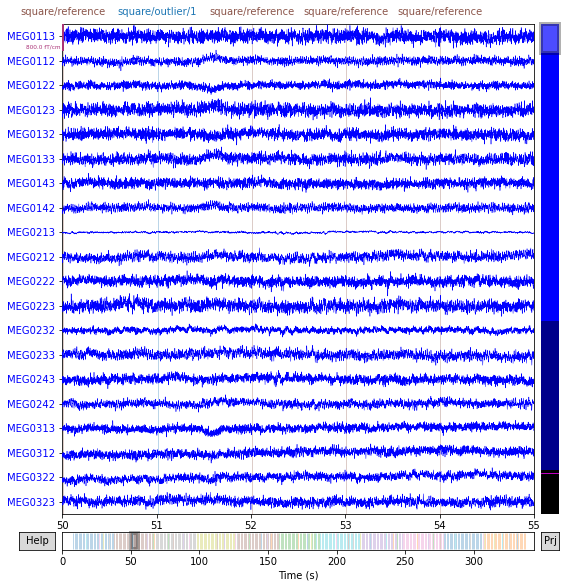

In [9]:
raw.plot(start=50, duration=5);

In [10]:
events, event_id = mne.events_from_annotations(raw)
event_id

Used Annotations descriptions: ['hinge/outlier/1', 'hinge/outlier/2', 'hinge/outlier/3', 'hinge/outlier/4', 'hinge/reference', 'isoTrapezoid/outlier/1', 'isoTrapezoid/outlier/2', 'isoTrapezoid/outlier/3', 'isoTrapezoid/outlier/4', 'isoTrapezoid/reference', 'kite/outlier/1', 'kite/outlier/2', 'kite/outlier/3', 'kite/outlier/4', 'kite/reference', 'losange/outlier/1', 'losange/outlier/2', 'losange/outlier/3', 'losange/outlier/4', 'losange/reference', 'parallelogram/outlier/1', 'parallelogram/outlier/2', 'parallelogram/outlier/3', 'parallelogram/outlier/4', 'parallelogram/reference', 'random/outlier/1', 'random/outlier/2', 'random/outlier/3', 'random/outlier/4', 'random/reference', 'rectangle/outlier/1', 'rectangle/outlier/2', 'rectangle/outlier/3', 'rectangle/outlier/4', 'rectangle/reference', 'rightKite/outlier/1', 'rightKite/outlier/2', 'rightKite/outlier/3', 'rightKite/outlier/4', 'rightKite/reference', 'rustedHinge/outlier/1', 'rustedHinge/outlier/2', 'rustedHinge/outlier/3', 'rustedH

{'hinge/outlier/1': 1,
 'hinge/outlier/2': 2,
 'hinge/outlier/3': 3,
 'hinge/outlier/4': 4,
 'hinge/reference': 5,
 'isoTrapezoid/outlier/1': 6,
 'isoTrapezoid/outlier/2': 7,
 'isoTrapezoid/outlier/3': 8,
 'isoTrapezoid/outlier/4': 9,
 'isoTrapezoid/reference': 10,
 'kite/outlier/1': 11,
 'kite/outlier/2': 12,
 'kite/outlier/3': 13,
 'kite/outlier/4': 14,
 'kite/reference': 15,
 'losange/outlier/1': 16,
 'losange/outlier/2': 17,
 'losange/outlier/3': 18,
 'losange/outlier/4': 19,
 'losange/reference': 20,
 'parallelogram/outlier/1': 21,
 'parallelogram/outlier/2': 22,
 'parallelogram/outlier/3': 23,
 'parallelogram/outlier/4': 24,
 'parallelogram/reference': 25,
 'random/outlier/1': 26,
 'random/outlier/2': 27,
 'random/outlier/3': 28,
 'random/outlier/4': 29,
 'random/reference': 30,
 'rectangle/outlier/1': 31,
 'rectangle/outlier/2': 32,
 'rectangle/outlier/3': 33,
 'rectangle/outlier/4': 34,
 'rectangle/reference': 35,
 'rightKite/outlier/1': 36,
 'rightKite/outlier/2': 37,
 'rightK

In [11]:
cal_fname = 'meg_conf/sss_cal_nsp_2017.dat'
ct_fname = 'meg_conf/ct_sparse_nsp_2017.fif'

mne_bids.write_meg_calibration(
    calibration=cal_fname,
    bids_path=bids_path
)
mne_bids.write_meg_crosstalk(
    fname=ct_fname,
    bids_path=bids_path
)
mne_bids.print_dir_tree(bids_root)

Writing fine-calibration file to bids_data_test/sub-ll180197/ses-220217/meg/sub-ll180197_ses-220217_acq-calibration_meg.dat
Overwriting existing file.
Writing crosstalk file to bids_data_test/sub-ll180197/ses-220217/meg/sub-ll180197_ses-220217_acq-crosstalk_meg.fif
|bids_data_test/
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-emptyroom/
|------ ses-20220217/
|--------- sub-emptyroom_ses-20220217_scans.tsv
|--------- meg/
|------------ sub-emptyroom_ses-20220217_task-noise_channels.tsv
|------------ sub-emptyroom_ses-20220217_task-noise_meg.fif
|------------ sub-emptyroom_ses-20220217_task-noise_meg.json
|--- sub-ll180197/
|------ ses-220217/
|--------- sub-ll180197_ses-220217_scans.tsv
|--------- anat/
|------------ sub-ll180197_ses-220217_T1w.json
|------------ sub-ll180197_ses-220217_T1w.nii.gz
|--------- meg/
|------------ sub-ll180197_ses-220217_acq-calibration_meg.dat
|------------ sub-ll180197_ses-220217_acq-crosstalk_meg.fif
|--

In [12]:
subject_er = 'emptyroom'
task_er = 'noise'
fname_er = f'{input_dir}/{subject}/{session}/emptyroom.fif'

raw_er = mne.io.read_raw(
    fname_er,
    allow_maxshield='yes',
    verbose=False
)
date_er = raw_er.info['meas_date']
session_er = f'{date_er.year:04}{date_er.month:02}{date_er.day:02}'

bids_path_er = mne_bids.BIDSPath(
    subject=subject_er,
    session=session_er,
    task=task_er,
    datatype='meg',
    suffix='meg',
    extension='.fif',
    root=bids_root
)
bids_path_er

/tmp/ipykernel_11124/1386660289.py:5: RuntimeWarning: This filename (./pogs_meg/ll_180197/220217/emptyroom.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_er = mne.io.read_raw(


BIDSPath(
root: bids_data_test
datatype: meg
basename: sub-emptyroom_ses-20220217_task-noise_meg.fif)

In [13]:
mne_bids.write_raw_bids(
    raw=raw_er,
    bids_path=bids_path_er,
    overwrite=True,
    symlink=True,
    # anonymize={'daysback': 40000},
    verbose=True
)
mne_bids.print_dir_tree(bids_root)

Writing 'bids_data_test/participants.tsv'...
Writing 'bids_data_test/participants.json'...
Writing of electrodes.tsv is not supported for data type "meg". Skipping ...
Writing 'bids_data_test/dataset_description.json'...
Writing 'bids_data_test/sub-emptyroom/ses-20220217/meg/sub-emptyroom_ses-20220217_task-noise_meg.json'...
Writing 'bids_data_test/sub-emptyroom/ses-20220217/meg/sub-emptyroom_ses-20220217_task-noise_channels.tsv'...
Reading 0 ... 99999  =      0.000 ...    99.999 secs...


/home/parietal/rhochenb/Development/mne-bids/mne_bids/write.py:1456: RuntimeWarning: This filename (./pogs_meg/ll_180197/220217/emptyroom.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_orig = reader[ext](**raw._init_kwargs)


Copying data files to sub-emptyroom_ses-20220217_task-noise_meg.fif
Writing 'bids_data_test/sub-emptyroom/ses-20220217/sub-emptyroom_ses-20220217_scans.tsv'...
Wrote bids_data_test/sub-emptyroom/ses-20220217/sub-emptyroom_ses-20220217_scans.tsv entry with meg/sub-emptyroom_ses-20220217_task-noise_meg.fif.
|bids_data_test/
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-emptyroom/
|------ ses-20220217/
|--------- sub-emptyroom_ses-20220217_scans.tsv
|--------- meg/
|------------ sub-emptyroom_ses-20220217_task-noise_channels.tsv
|------------ sub-emptyroom_ses-20220217_task-noise_meg.fif
|------------ sub-emptyroom_ses-20220217_task-noise_meg.json
|--- sub-ll180197/
|------ ses-220217/
|--------- sub-ll180197_ses-220217_scans.tsv
|--------- anat/
|------------ sub-ll180197_ses-220217_T1w.json
|------------ sub-ll180197_ses-220217_T1w.nii.gz
|--------- meg/
|------------ sub-ll180197_ses-220217_acq-calibration_meg.dat
|------------ sub-ll18

In [14]:
mne_bids.write_raw_bids(
    raw=raw,
    bids_path=bids_path,
    events_data=events,
    event_id=event_id,
    empty_room=bids_path_er,
    overwrite=True,
    symlink=True,
    # anonymize={'daysback': 40000},
    verbose=True
)

Opening raw data file /storage/store/work/agramfor/data_ns_hackathon/pogs_meg/ll_180197/220217/run1_raw.fif...
    Read a total of 13 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v6 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v7 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v8 (1 x 306)  idle
    Range : 134000 ... 477999 =    134.000 ...   477.999 secs
Ready.
Writing 'bids_data_test/participants.tsv'...
Writing 'bids_data_test/participants.jso

/home/parietal/rhochenb/Development/mne-bids/mne_bids/write.py:1456: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw_orig = reader[ext](**raw._init_kwargs)


Reading 0 ... 343999  =      0.000 ...   343.999 secs...
Copying data files to sub-ll180197_ses-220217_task-task_run-1_meg.fif
Writing 'bids_data_test/sub-ll180197/ses-220217/sub-ll180197_ses-220217_scans.tsv'...
Wrote bids_data_test/sub-ll180197/ses-220217/sub-ll180197_ses-220217_scans.tsv entry with meg/sub-ll180197_ses-220217_task-task_run-1_meg.fif.


BIDSPath(
root: bids_data_test
datatype: meg
basename: sub-ll180197_ses-220217_task-task_run-1_meg.fif)

In [15]:
fname_t1 =f'{input_dir}/{subject}/{session}/T1.nii.gz'

bids_path_t1 = bids_path.copy().update(
    task=None,
    run=None,
    suffix='T1w',
    extension='.nii.gz',
    datatype='anat'
)
bids_path_t1

BIDSPath(
root: bids_data_test
datatype: anat
basename: sub-ll180197_ses-220217_T1w.nii.gz)

In [16]:
mne_bids.write_anat(
    image=fname_t1,
    bids_path=bids_path_t1,
    overwrite=True
)
mne_bids.print_dir_tree(bids_root)

|bids_data_test/
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-emptyroom/
|------ ses-20220217/
|--------- sub-emptyroom_ses-20220217_scans.tsv
|--------- meg/
|------------ sub-emptyroom_ses-20220217_task-noise_channels.tsv
|------------ sub-emptyroom_ses-20220217_task-noise_meg.fif
|------------ sub-emptyroom_ses-20220217_task-noise_meg.json
|--- sub-ll180197/
|------ ses-220217/
|--------- sub-ll180197_ses-220217_scans.tsv
|--------- anat/
|------------ sub-ll180197_ses-220217_T1w.json
|------------ sub-ll180197_ses-220217_T1w.nii.gz
|--------- meg/
|------------ sub-ll180197_ses-220217_acq-calibration_meg.dat
|------------ sub-ll180197_ses-220217_acq-crosstalk_meg.fif
|------------ sub-ll180197_ses-220217_coordsystem.json
|------------ sub-ll180197_ses-220217_task-task_run-1_channels.tsv
|------------ sub-ll180197_ses-220217_task-task_run-1_events.tsv
|------------ sub-ll180197_ses-220217_task-task_run-1_meg.fif
|------------ sub-ll

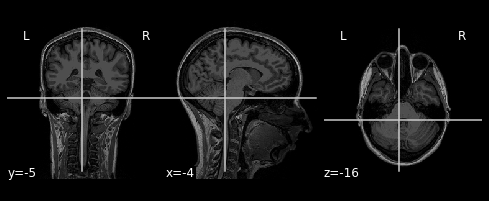

In [20]:
from nilearn.plotting import plot_anat

plot_anat(str(bids_path_t1))

In [21]:
fs_subjects_dir = './bids_data/derivatives/freesurfer/subjects'
fs_subject = 'sub-09'
fname_trans = f'{fs_subjects_dir}/{fs_subject}/bem/{fs_subject}-trans.fif'

landmarks = mne_bids.get_anat_landmarks(
    image=fname_t1,
    info=raw.info,
    trans=fname_trans,
    fs_subject=fs_subject,
    fs_subjects_dir=fs_subjects_dir
)

mne_bids.write_anat(
    image=fname_t1,
    bids_path=bids_path_t1,
    landmarks=landmarks,
    overwrite=True
)
mne_bids.print_dir_tree(bids_root)

Writing 'bids_data_test/sub-ll180197/ses-220217/anat/sub-ll180197_ses-220217_T1w.json'...
|bids_data_test/
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-emptyroom/
|------ ses-20220217/
|--------- sub-emptyroom_ses-20220217_scans.tsv
|--------- meg/
|------------ sub-emptyroom_ses-20220217_task-noise_channels.tsv
|------------ sub-emptyroom_ses-20220217_task-noise_meg.fif
|------------ sub-emptyroom_ses-20220217_task-noise_meg.json
|--- sub-ll180197/
|------ ses-220217/
|--------- sub-ll180197_ses-220217_scans.tsv
|--------- anat/
|------------ sub-ll180197_ses-220217_T1w.json
|------------ sub-ll180197_ses-220217_T1w.nii.gz
|--------- meg/
|------------ sub-ll180197_ses-220217_acq-calibration_meg.dat
|------------ sub-ll180197_ses-220217_acq-crosstalk_meg.fif
|------------ sub-ll180197_ses-220217_coordsystem.json
|------------ sub-ll180197_ses-220217_task-task_run-1_channels.tsv
|------------ sub-ll180197_ses-220217_task-task_run-1_eve

In [23]:
trans = mne_bids.get_head_mri_trans(
    bids_path=bids_path,
    t1_bids_path=bids_path_t1,
    fs_subject=fs_subject,
    fs_subjects_dir=fs_subjects_dir,
    verbose=False
)
trans

/home/parietal/rhochenb/Development/mne-bids/mne_bids/read.py:57: RuntimeWarning: This file contains raw Internal Active Shielding data. It may be distorted. Elekta recommends it be run through MaxFilter to produce reliable results. Consider closing the file and running MaxFilter on the data.
  raw = reader[ext](raw_path, allow_maxshield, **kwargs)
/home/parietal/rhochenb/Development/mne-bids/mne_bids/read.py:564: RuntimeWarning: The unit for channel(s) STI001, STI002, STI003, STI004, STI005, STI006, STI007, STI008, STI009, STI010, STI011, STI012, STI013, STI014, STI015, STI016, STI101, STI201, STI301 has changed from V to NA.
  raw.set_channel_types(ch_type_map_avail)


<Transform | head->MRI (surface RAS)>
[[ 0.99935293 -0.01144447  0.03409905  0.000616  ]
 [ 0.01518899  0.99363005 -0.11166293 -0.00605521]
 [-0.03260392  0.1121086   0.99316094 -0.01032828]
 [ 0.          0.          0.          1.        ]]

In [24]:
mne.viz.plot_alignment(
    info=raw.info,
    trans=trans,
    subject=fs_subject,
    subjects_dir=fs_subjects_dir,
    coord_frame='mri'
)

Using pyvistaqt 3d backend.



Error: Canceled future for execute_request message before replies were done

In [ ]:
# fname_fiducials = f'{fs_subjects_dir}/{fs_subject}/bem/{fs_subject}-fiducials.fif'

# dm = mne.coreg.read_fiducials(fname_fiducials)
# dm